### Tarea 1
<div style="text-align: justify">
    Trabajo Realizado por:<br>
    <b>Julián Zúñiga Errázuriz</b> en conjunto con <b>Pia San Martin Correa</b>
</div><br>


<div style="text-align: justify"> En este trabajo se pretende revisar el efecto regional de las cuarentenas en Chile, donde se mostraran 16 graficos uno por región de como fue la evolución de la cuarentena por dia en cada una de ellas.</div>
<br>
<div style="text-align: justify">Respondiendo 2 preguntas:</div>
<div style="text-align: justify">
    <li type="circle">Qué día hubo la mayor cantidad de personas en cuarentena en el país.</li>
    <li type="circle">Qué día hubo la mayor cantidad de personas en cuarentena en cada región.</li>
</div>
<br>
<div style="text-align: justify"> Mención por el aporte realizado al trabajo:<br> </div>
<div style="text-align: justify"> 
    <li type="circle"><b>Leo Ferres:</b> Por medio de las clases realizadas en conjunto con los ejemplos entregados (Limpieza de datos y graficarlos).</li>
    <li type="circle">
        <b>Peter Leimbigler:</b> Entregando posibles soluciónes para realizar la suma de datos que se encuentren entre dos fechas especificas.<br>
         <a href="https://stackoverflow.com/questions/48103845/python-pandas-sum-values-in-columns-if-date-between-2-dates">Link respuesta Peter Leimbigler</a>
    </li>
</div>



In [29]:
#Se inicia importando las librerias pandas para trabajar con los dataframe y seaborn para la realización de los graficos junto con matplotlib.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Importar los datasets necesarios

In [30]:
#El siguiente dataset incluye el codigo de comuna la región y las fechas de cuarentena como datos relevantes para el problema.
CuarentenasTotales = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Totales.csv')

In [31]:
#El siguiente dataset incluye el codigo de comuna y la cantidad de pblación que residen en ellas.
PobComuna = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv')

In [32]:
#Reviso las 5 primeras filas de datos para ver si se importo correcatemente el dataset.
CuarentenasTotales.head()

,ID,Nombre,Estado,Alcance,Fecha de Inicio,Fecha de Término,Código CUT Comuna,Detalle,Superficie en m2,Perímetro en m,Region,n_REGION
0,1,Arica,Histórica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,Corresponde al Radio Urbano de la Ciudad de Ar...,28050418.80,48722.30001,15,R15
1,2,Santiago Norte,Histórica,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,Corresponde a la extensión de la cuarentena en...,19939218.57,21599.35134,13,R13
2,3,Puente Alto Poniente,Histórica,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,Corresponde al sector delimitado por la Av. Co...,42364268.21,30428.05152,13,R13
3,4,El Bosque,Histórica,Comuna completa,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,Aplicada a la totalidad de la comuna. Se incor...,20622713.23,18788.87075,13,R13
4,5,San Bernardo Nororiente,Histórica,Sector Específico,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,Corresponde al sector delimitado por los limit...,16326216.83,24929.14572,13,R13


In [33]:
#Reviso las 5 primeras filas de datos para ver si se importo correcatemente el dataset.
PobComuna.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-09-10,2021-09-13,2021-09-17,2021-09-20,2021-09-24,2021-09-27,2021-10-01,2021-10-04,2021-10-08,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,29763.0,29836.0,29929.0,30002.0,30128.0,30239.0,30376.0,30463.0,30536.0,12335.2
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,67.0,67.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,5677.2
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,205.0,207.0,208.0,207.0,211.0,215.0,213.0,213.0,213.0,8469.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158.0,163.0,161.0,163.0,165.0,165.0,167.0,170.0,175.0,NaN


##### Limpieza de los datos

In [34]:
# El dataset incluye muchas columnas las cuales la mayoria son fechas y lo mas relevante para el problema es tener el codigo de comuna y la población, el siguiente codigo deja solo esas 2 columnas
PobComuna = PobComuna[['Codigo comuna','Poblacion']]

In [35]:
# Se revisa el tipo de dato en que estan las columnas donde se aprecia que existen datos null o vacios ademas de las 346 comunas que existen en Chile por lo que hay que eliminarlas.
PobComuna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo comuna  346 non-null    float64
 1   Poblacion      346 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


In [36]:
#Se borran los datos que contengan datos NA.
PobComuna = PobComuna.dropna()

In [37]:
#Se revisa que se haya realizado el cambio y ahora el dataset este correcto
PobComuna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo comuna  346 non-null    float64
 1   Poblacion      346 non-null    float64
dtypes: float64(2)
memory usage: 8.1 KB


In [38]:
#Reviso el formato en que se encuentran los datos y si existen datos null y tambien poder elegir las columnas que seran utiles para el analisis
CuarentenasTotales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 187 non-null    int64  
 1   Nombre             187 non-null    object 
 2   Estado             187 non-null    object 
 3   Alcance            99 non-null     object 
 4   Fecha de Inicio    187 non-null    object 
 5   Fecha de Término   187 non-null    object 
 6   Código CUT Comuna  187 non-null    int64  
 7   Detalle            99 non-null     object 
 8   Superficie en m2   99 non-null     float64
 9   Perímetro en m     99 non-null     float64
 10  Region             187 non-null    int64  
 11  n_REGION           187 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 17.7+ KB


In [39]:
#Selecciono las columnas que seran utiles para el desarrollo del del problema
CuarentenasTotales = CuarentenasTotales[['Region','Nombre','Código CUT Comuna','Fecha de Inicio','Fecha de Término']]

In [40]:
#Se convierte el tipo de dato de Fecha que esta como object a date esto para las columnas de 'Fecha de Inicio' y ' Fecha de Término'
CuarentenasTotales['Fecha de Inicio'] = pd.to_datetime(CuarentenasTotales['Fecha de Inicio'])
CuarentenasTotales['Fecha de Término'] = pd.to_datetime(CuarentenasTotales['Fecha de Término'])

In [41]:
#Se vuelve a revisar que se tenga realizado los cambios correctamente
CuarentenasTotales.head()

,Region,Nombre,Código CUT Comuna,Fecha de Inicio,Fecha de Término
0,15,Arica,15101,2020-04-16 22:00:00,2020-05-15 22:00:00
1,13,Santiago Norte,13101,2020-04-13 05:00:00,2020-05-05 22:00:00
2,13,Puente Alto Poniente,13201,2020-04-09 22:00:00,2020-05-08 22:00:00
3,13,El Bosque,13105,2020-04-16 22:00:00,2020-09-21 05:00:00
4,13,San Bernardo Nororiente,13401,2020-04-16 22:00:00,2020-05-08 22:00:00


In [42]:
# Se rectifica que el tipo de dato de las columnas que se pasaron a tipo date se tengan modificado correctamente
CuarentenasTotales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Region             187 non-null    int64         
 1   Nombre             187 non-null    object        
 2   Código CUT Comuna  187 non-null    int64         
 3   Fecha de Inicio    187 non-null    datetime64[ns]
 4   Fecha de Término   187 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 7.4+ KB


In [43]:
#Para poder combinar los dos dataset por medio de la columna de codigo comuna se requiere que ambas tengan el mismo nombre, es por esto que aqui se renombre las columnas ademas
#de quitarle los espacios a las columnas tipo fecha para poder trabajar mejor con ellas.
CuarentenasTotales = CuarentenasTotales.rename(columns= {'Código CUT Comuna': 'Codigo comuna', 'Fecha de Inicio': 'Fecha_de_Inicio', 'Fecha de Término': 'Fecha_de_Término'})

In [44]:
# Utilizando merge y el Codigo de comuna como clave foranea para unir los dos dataset
CuarentenasTotales = CuarentenasTotales.merge(PobComuna,on='Codigo comuna')

In [45]:
# Se revisa si se unio correctamente la información
CuarentenasTotales.head()

,Region,Nombre,Codigo comuna,Fecha_de_Inicio,Fecha_de_Término,Poblacion
0,15,Arica,15101,2020-04-16 22:00:00,2020-05-15 22:00:00,247552.0
1,15,Arica Re-Ingreso urbano,15101,2020-07-14 22:00:00,2020-11-09 05:00:00,247552.0
2,13,Santiago Norte,13101,2020-04-13 05:00:00,2020-05-05 22:00:00,503147.0
3,13,Santiago,13101,2020-03-26 21:00:00,2020-04-13 05:00:00,503147.0
4,13,Santiago Extensión a Total,13101,2020-05-05 22:00:00,2020-08-17 05:00:00,503147.0


In [46]:
# Como el dataset de las comunas en cuarentenas tenia menos información e incluya menos comunas el dataset toma en cuenta solamente 187 comunas para el analisis
CuarentenasTotales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Region            187 non-null    int64         
 1   Nombre            187 non-null    object        
 2   Codigo comuna     187 non-null    int64         
 3   Fecha_de_Inicio   187 non-null    datetime64[ns]
 4   Fecha_de_Término  187 non-null    datetime64[ns]
 5   Poblacion         187 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 10.2+ KB


##### Responder al problema

In [47]:
# Para graficar y analizar los datos se realiza un rango de datos obteniendo el minimo de la fecha de inicio para el intervalo inferior y el maximo de la fecha de termino para el limite superior.
#Este se deberia haber realizado uno por región ya que esto conllevara a que en regiones que se tiene menos información aparezcan como 0 personas en cuarentena sin embargo puede ser que si exista
# una parte de la población en cuarentena.
RangoData = pd.date_range(CuarentenasTotales.Fecha_de_Inicio.min(),CuarentenasTotales.Fecha_de_Término.max())

In [48]:
#Se crea un nuevo datase que incluye el rango de todas las fechas desde el limite inferior has el superio con el maximo de la fecha de término.
Cuarentena_pais = pd.DataFrame(data = RangoData, columns = ['Fecha'])

#Se crea una función que suma la población de la comuna si es que la fecha es mayor que la del dia que comenzo la cuarentena y es menor a la fecha de termino
#Luego se oncluye estos valores al dataset
def sum_pob_cuarentena (date):
    return CuarentenasTotales[(CuarentenasTotales['Fecha_de_Inicio']<= date) & (CuarentenasTotales['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_pais[['Suma_pob_cuarentena']] = Cuarentena_pais['Fecha'].transform(sum_pob_cuarentena)

#Se revisa que el dataset este correcto en este caso es a nivel pais.
Cuarentena_pais.head(10)

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,572.0
1,2020-03-13 21:00:00,572.0
2,2020-03-14 21:00:00,572.0
3,2020-03-15 21:00:00,572.0
4,2020-03-16 21:00:00,572.0
5,2020-03-17 21:00:00,572.0
6,2020-03-18 21:00:00,572.0
7,2020-03-19 21:00:00,572.0
8,2020-03-20 21:00:00,8849.0
9,2020-03-21 21:00:00,8849.0


In [49]:
#Filtra las fechas en la que estuvo la mayor cantidad de la población en cuarentena y muestra en un dataset con las fechas que esto a ocurrido y el total de la población
Cuarentena_pais[Cuarentena_pais.Suma_pob_cuarentena == Cuarentena_pais.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
125,2020-07-15 21:00:00,10826730.0
126,2020-07-16 21:00:00,10826730.0
127,2020-07-17 21:00:00,10826730.0
128,2020-07-18 21:00:00,10826730.0
129,2020-07-19 21:00:00,10826730.0
130,2020-07-20 21:00:00,10826730.0
131,2020-07-21 21:00:00,10826730.0
132,2020-07-22 21:00:00,10826730.0
133,2020-07-23 21:00:00,10826730.0
134,2020-07-24 21:00:00,10826730.0


Text(0.5, 1.0, 'Pais')

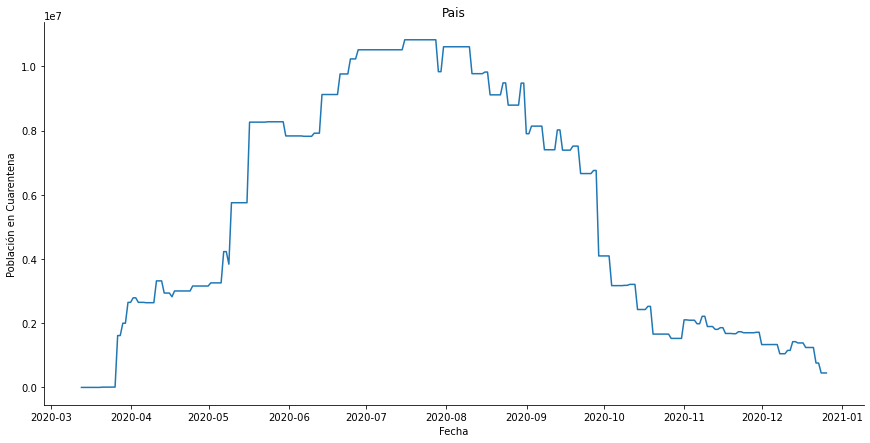

In [50]:
#Se realiza el grafico del data de Cuarentena_pais tomando en el eje de las abcisas la 'Fecha' y el de las ordenadas la suma de la población en cuarentena
#Se coloco el titulo de Pais al grafico se le selección el tamaño ademas de agregarle el nombre respectivo a cada eje en el grafico.
sns.relplot(data = Cuarentena_pais, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Pais')

In [51]:
# Se realizo un dataset para cada región con las respectivas comunas que le pertencen.
RG_1 = CuarentenasTotales[CuarentenasTotales['Region'] == 1]
RG_2 = CuarentenasTotales[CuarentenasTotales['Region'] == 2]
RG_3 = CuarentenasTotales[CuarentenasTotales['Region'] == 3]
RG_4 = CuarentenasTotales[CuarentenasTotales['Region'] == 4]
RG_5 = CuarentenasTotales[CuarentenasTotales['Region'] == 5]
RG_6 = CuarentenasTotales[CuarentenasTotales['Region'] == 6]
RG_7 = CuarentenasTotales[CuarentenasTotales['Region'] == 7]
RG_8 = CuarentenasTotales[CuarentenasTotales['Region'] == 8]
RG_9 = CuarentenasTotales[CuarentenasTotales['Region'] == 9]
RG_10 = CuarentenasTotales[CuarentenasTotales['Region'] == 10]
RG_11 = CuarentenasTotales[CuarentenasTotales['Region'] == 11]
RG_12 = CuarentenasTotales[CuarentenasTotales['Region'] == 12]
RG_13 = CuarentenasTotales[CuarentenasTotales['Region'] == 13]
RG_14 = CuarentenasTotales[CuarentenasTotales['Region'] == 14]
RG_15 = CuarentenasTotales[CuarentenasTotales['Region'] == 15]
RG_16 = CuarentenasTotales[CuarentenasTotales['Region'] == 16]

### Región de Tarapacá I

In [52]:
Cuarentena_RG1 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_1[(RG_1['Fecha_de_Inicio']<= date) & (RG_1['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG1[['Suma_pob_cuarentena']] = Cuarentena_RG1['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG1

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región de Tarapaca I')

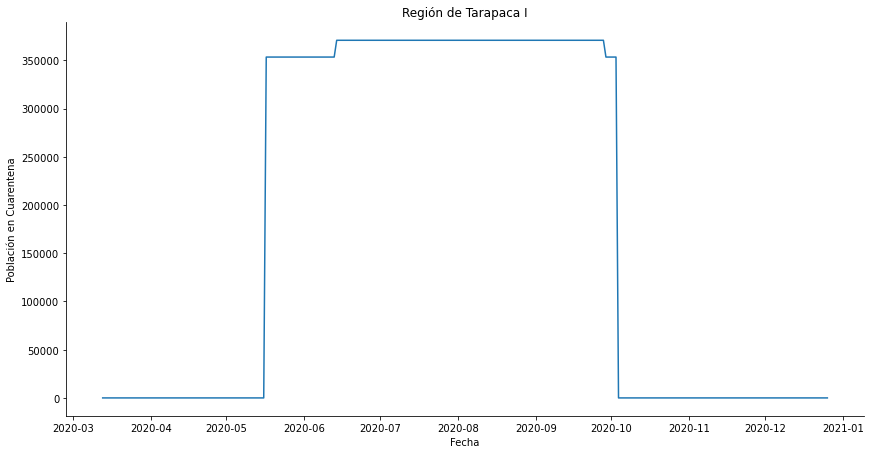

In [53]:
sns.relplot(data = Cuarentena_RG1, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de Tarapaca I')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [54]:
Cuarentena_RG1[Cuarentena_RG1.Suma_pob_cuarentena == Cuarentena_RG1.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
93,2020-06-13 21:00:00,370857.0
94,2020-06-14 21:00:00,370857.0
95,2020-06-15 21:00:00,370857.0
96,2020-06-16 21:00:00,370857.0
97,2020-06-17 21:00:00,370857.0
...,...,...
195,2020-09-23 21:00:00,370857.0
196,2020-09-24 21:00:00,370857.0
197,2020-09-25 21:00:00,370857.0
198,2020-09-26 21:00:00,370857.0


### Región de Antofagasta II

In [55]:
Cuarentena_RG2 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_2[(RG_2['Fecha_de_Inicio']<= date) & (RG_2['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG2[['Suma_pob_cuarentena']] = Cuarentena_RG2['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG2

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región de Antofagasta II')

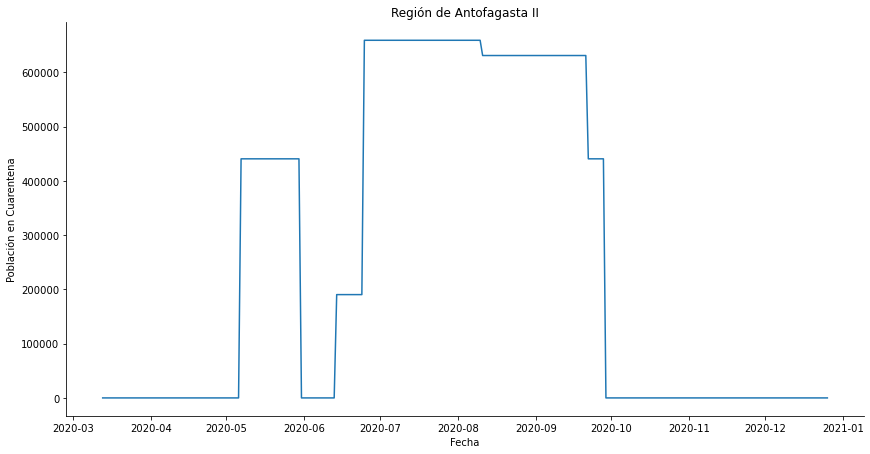

In [56]:
sns.relplot(data = Cuarentena_RG2, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de Antofagasta II')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [57]:
Cuarentena_RG2[Cuarentena_RG2.Suma_pob_cuarentena == Cuarentena_RG2.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
104,2020-06-24 21:00:00,658916.0
105,2020-06-25 21:00:00,658916.0
106,2020-06-26 21:00:00,658916.0
107,2020-06-27 21:00:00,658916.0
108,2020-06-28 21:00:00,658916.0
109,2020-06-29 21:00:00,658916.0
110,2020-06-30 21:00:00,658916.0
111,2020-07-01 21:00:00,658916.0
112,2020-07-02 21:00:00,658916.0
113,2020-07-03 21:00:00,658916.0


### Región de Atacama III

In [58]:
Cuarentena_RG3 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_3[(RG_3['Fecha_de_Inicio']<= date) & (RG_3['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG3[['Suma_pob_cuarentena']] = Cuarentena_RG3['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG3

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región de Atacama III')

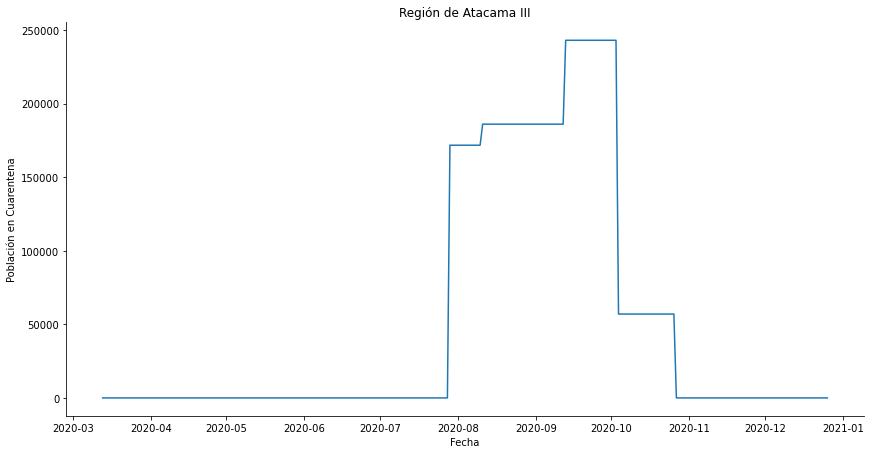

In [59]:
sns.relplot(data = Cuarentena_RG3, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de Atacama III')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [60]:
Cuarentena_RG3[Cuarentena_RG3.Suma_pob_cuarentena == Cuarentena_RG3.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
184,2020-09-12 21:00:00,243087.0
185,2020-09-13 21:00:00,243087.0
186,2020-09-14 21:00:00,243087.0
187,2020-09-15 21:00:00,243087.0
188,2020-09-16 21:00:00,243087.0
189,2020-09-17 21:00:00,243087.0
190,2020-09-18 21:00:00,243087.0
191,2020-09-19 21:00:00,243087.0
192,2020-09-20 21:00:00,243087.0
193,2020-09-21 21:00:00,243087.0


### Región de Coquimbo IV

In [61]:
Cuarentena_RG4 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_4[(RG_4['Fecha_de_Inicio']<= date) & (RG_4['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG4[['Suma_pob_cuarentena']] = Cuarentena_RG4['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG4

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región de Coquimbo IV')

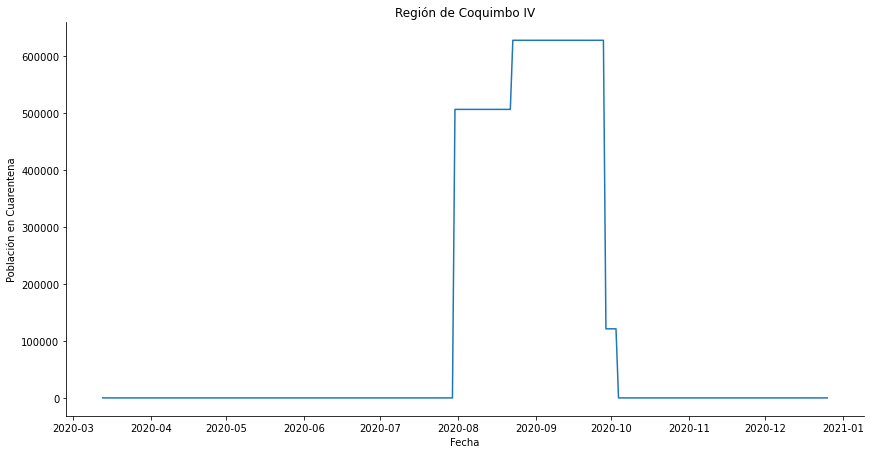

In [62]:
sns.relplot(data = Cuarentena_RG4, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de Coquimbo IV')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [63]:
Cuarentena_RG4[Cuarentena_RG4.Suma_pob_cuarentena == Cuarentena_RG4.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
163,2020-08-22 21:00:00,627660.0
164,2020-08-23 21:00:00,627660.0
165,2020-08-24 21:00:00,627660.0
166,2020-08-25 21:00:00,627660.0
167,2020-08-26 21:00:00,627660.0
168,2020-08-27 21:00:00,627660.0
169,2020-08-28 21:00:00,627660.0
170,2020-08-29 21:00:00,627660.0
171,2020-08-30 21:00:00,627660.0
172,2020-08-31 21:00:00,627660.0


### Región de Valparaiso V

In [64]:
Cuarentena_RG5 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_5[(RG_5['Fecha_de_Inicio']<= date) & (RG_5['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG5[['Suma_pob_cuarentena']] = Cuarentena_RG5['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG5

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región de Valparaiso V')

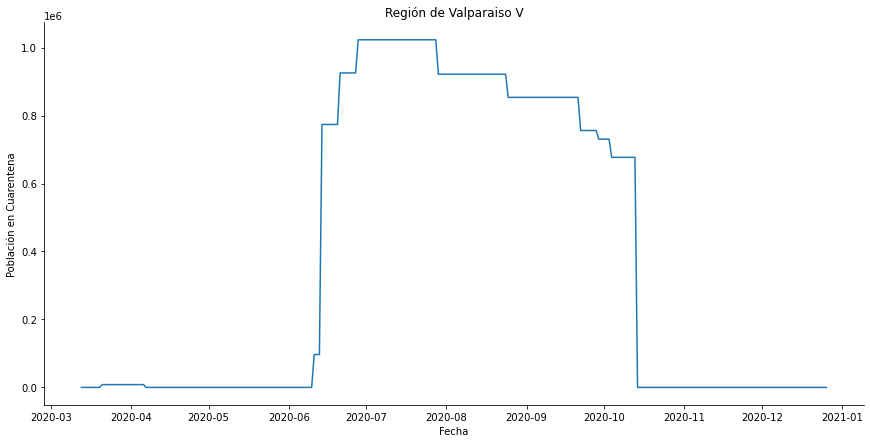

In [65]:
sns.relplot(data = Cuarentena_RG5, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de Valparaiso V')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [66]:
Cuarentena_RG5[Cuarentena_RG5.Suma_pob_cuarentena == Cuarentena_RG5.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
107,2020-06-27 21:00:00,1023023.0
108,2020-06-28 21:00:00,1023023.0
109,2020-06-29 21:00:00,1023023.0
110,2020-06-30 21:00:00,1023023.0
111,2020-07-01 21:00:00,1023023.0
112,2020-07-02 21:00:00,1023023.0
113,2020-07-03 21:00:00,1023023.0
114,2020-07-04 21:00:00,1023023.0
115,2020-07-05 21:00:00,1023023.0
116,2020-07-06 21:00:00,1023023.0


### Región de O'Higgins VI

In [67]:
Cuarentena_RG6 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_6[(RG_6['Fecha_de_Inicio']<= date) & (RG_6['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG6[['Suma_pob_cuarentena']] = Cuarentena_RG6['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG6

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región de OHiggins VI')

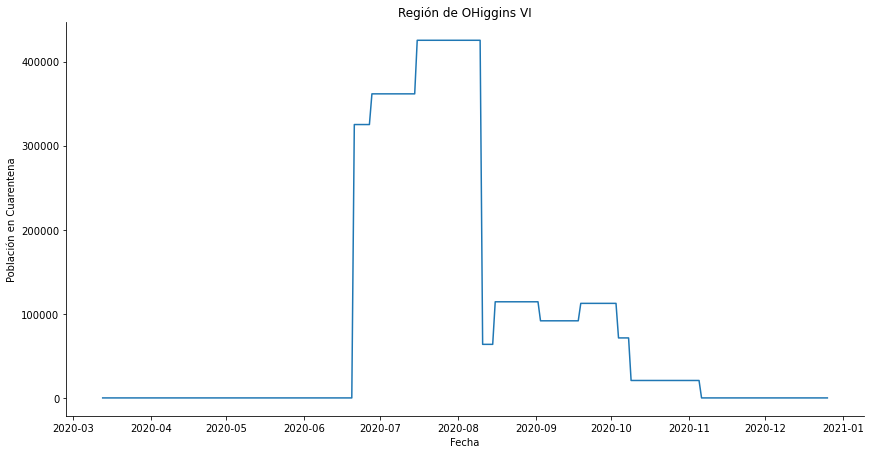

In [68]:
sns.relplot(data = Cuarentena_RG6, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de OHiggins VI')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [69]:
Cuarentena_RG6[Cuarentena_RG6.Suma_pob_cuarentena == Cuarentena_RG6.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
125,2020-07-15 21:00:00,425338.0
126,2020-07-16 21:00:00,425338.0
127,2020-07-17 21:00:00,425338.0
128,2020-07-18 21:00:00,425338.0
129,2020-07-19 21:00:00,425338.0
130,2020-07-20 21:00:00,425338.0
131,2020-07-21 21:00:00,425338.0
132,2020-07-22 21:00:00,425338.0
133,2020-07-23 21:00:00,425338.0
134,2020-07-24 21:00:00,425338.0


### Región del Maule VII

In [70]:
Cuarentena_RG7 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_7[(RG_7['Fecha_de_Inicio']<= date) & (RG_7['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG7[['Suma_pob_cuarentena']] = Cuarentena_RG7['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG7

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región del Maule VII')

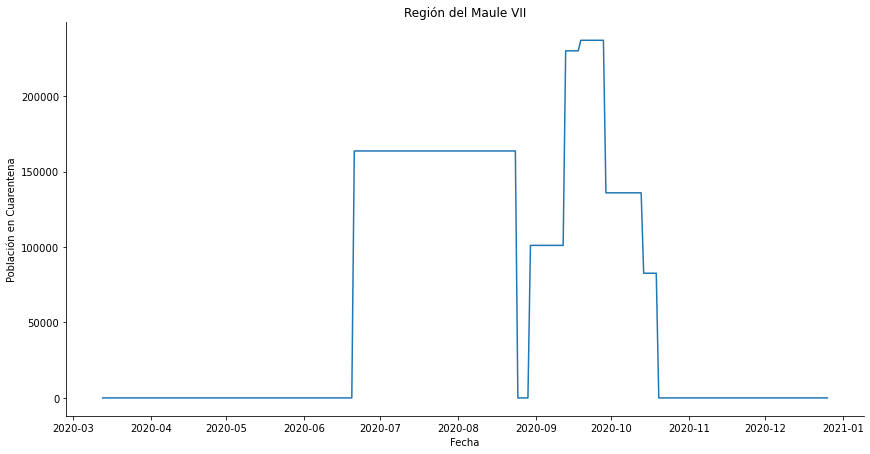

In [71]:
sns.relplot(data = Cuarentena_RG7, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región del Maule VII')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [72]:
Cuarentena_RG7[Cuarentena_RG7.Suma_pob_cuarentena == Cuarentena_RG7.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
190,2020-09-18 21:00:00,236964.0
191,2020-09-19 21:00:00,236964.0
192,2020-09-20 21:00:00,236964.0
193,2020-09-21 21:00:00,236964.0
194,2020-09-22 21:00:00,236964.0
195,2020-09-23 21:00:00,236964.0
196,2020-09-24 21:00:00,236964.0
197,2020-09-25 21:00:00,236964.0
198,2020-09-26 21:00:00,236964.0
199,2020-09-27 21:00:00,236964.0


### Región del Biobío VIII

In [73]:
Cuarentena_RG8 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_8[(RG_8['Fecha_de_Inicio']<= date) & (RG_8['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG8[['Suma_pob_cuarentena']] = Cuarentena_RG8['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG8

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,328089.0
285,2020-12-22 21:00:00,328089.0
286,2020-12-23 21:00:00,328089.0
287,2020-12-24 21:00:00,328089.0


Text(0.5, 1.0, 'Región del Biobío VIII')

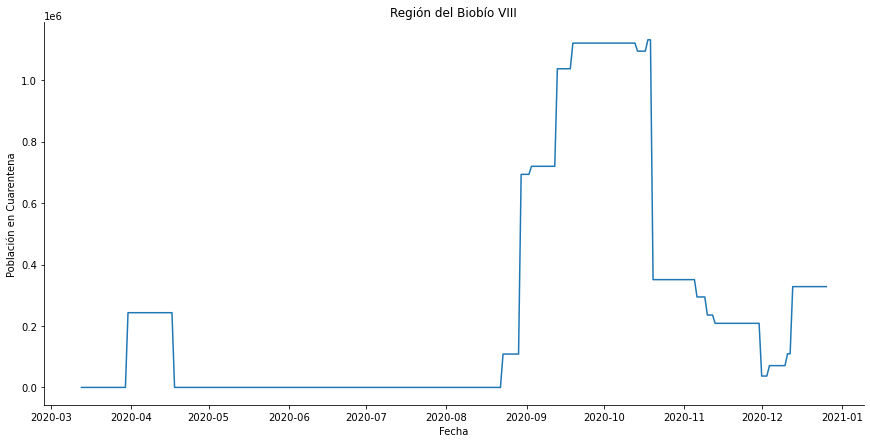

In [46]:
sns.relplot(data = Cuarentena_RG8, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región del Biobío VIII')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [47]:
Cuarentena_RG8[Cuarentena_RG8.Suma_pob_cuarentena == Cuarentena_RG8.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
219,2020-10-17 21:00:00,1131488.0
220,2020-10-18 21:00:00,1131488.0


### Región de la Araucanía IX

In [48]:
Cuarentena_RG9 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_9[(RG_9['Fecha_de_Inicio']<= date) & (RG_9['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG9[['Suma_pob_cuarentena']] = Cuarentena_RG9['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG9

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,124464.0
285,2020-12-22 21:00:00,124464.0
286,2020-12-23 21:00:00,96804.0
287,2020-12-24 21:00:00,96804.0


Text(0.5, 1.0, 'Región de la Araucanía IX')

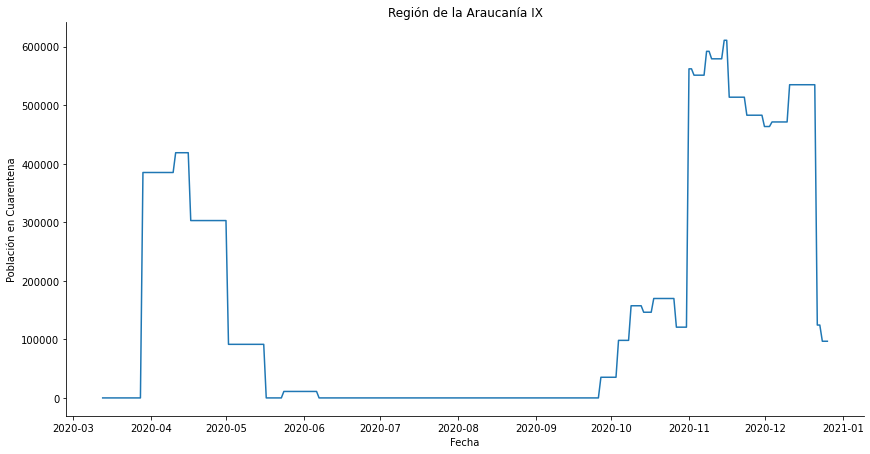

In [49]:
sns.relplot(data = Cuarentena_RG9, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de la Araucanía IX')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [50]:
Cuarentena_RG9[Cuarentena_RG9.Suma_pob_cuarentena == Cuarentena_RG9.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
247,2020-11-14 21:00:00,610876.0
248,2020-11-15 21:00:00,610876.0


### Región de los Lagos X

In [51]:
Cuarentena_RG10 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_10[(RG_10['Fecha_de_Inicio']<= date) & (RG_10['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG10[['Suma_pob_cuarentena']] = Cuarentena_RG10['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG10

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,51638.0
285,2020-12-22 21:00:00,51638.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región de los Lagos X')

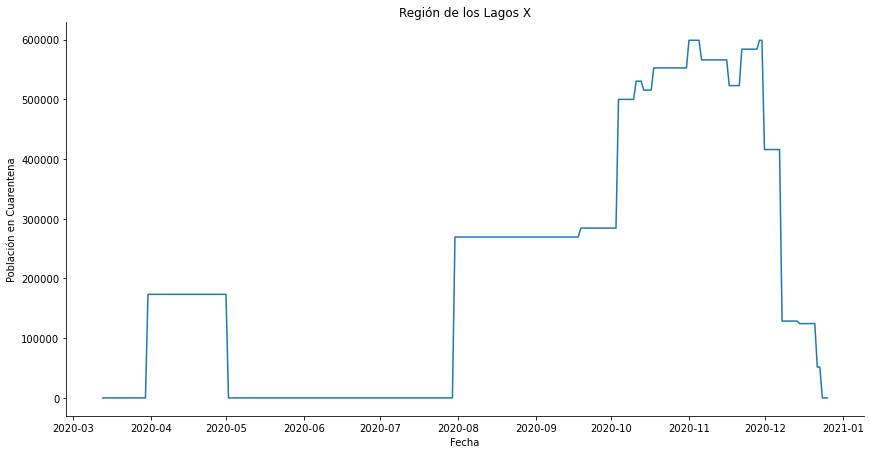

In [52]:
sns.relplot(data = Cuarentena_RG10, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de los Lagos X')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [53]:
Cuarentena_RG10[Cuarentena_RG10.Suma_pob_cuarentena == Cuarentena_RG10.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
261,2020-11-28 21:00:00,598786.0
262,2020-11-29 21:00:00,598786.0


### Región de Aysén XI

In [54]:
Cuarentena_RG11 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_11[(RG_11['Fecha_de_Inicio']<= date) & (RG_11['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG11[['Suma_pob_cuarentena']] = Cuarentena_RG11['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG11

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,572.0
1,2020-03-13 21:00:00,572.0
2,2020-03-14 21:00:00,572.0
3,2020-03-15 21:00:00,572.0
4,2020-03-16 21:00:00,572.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región de Aysén XI')

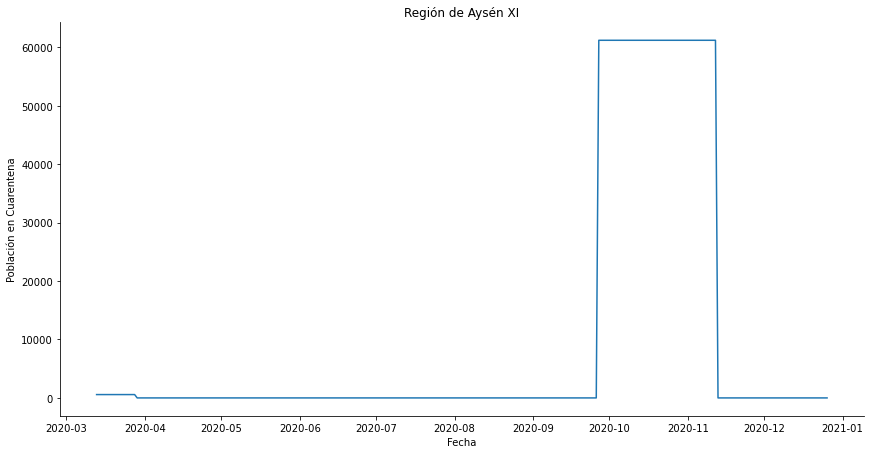

In [55]:
sns.relplot(data = Cuarentena_RG11, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de Aysén XI')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [56]:
Cuarentena_RG11[Cuarentena_RG11.Suma_pob_cuarentena == Cuarentena_RG11.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
198,2020-09-26 21:00:00,61210.0
199,2020-09-27 21:00:00,61210.0
200,2020-09-28 21:00:00,61210.0
201,2020-09-29 21:00:00,61210.0
202,2020-09-30 21:00:00,61210.0
203,2020-10-01 21:00:00,61210.0
204,2020-10-02 21:00:00,61210.0
205,2020-10-03 21:00:00,61210.0
206,2020-10-04 21:00:00,61210.0
207,2020-10-05 21:00:00,61210.0


### Región de Magallanes y de la Antártica Chilena XII

In [57]:
Cuarentena_RG12 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_12[(RG_12['Fecha_de_Inicio']<= date) & (RG_12['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG12[['Suma_pob_cuarentena']] = Cuarentena_RG12['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG12

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,25765.0
285,2020-12-22 21:00:00,25765.0
286,2020-12-23 21:00:00,25765.0
287,2020-12-24 21:00:00,25765.0


Text(0.5, 1.0, 'Región de Magallanes y de la Antártica Chilena XII')

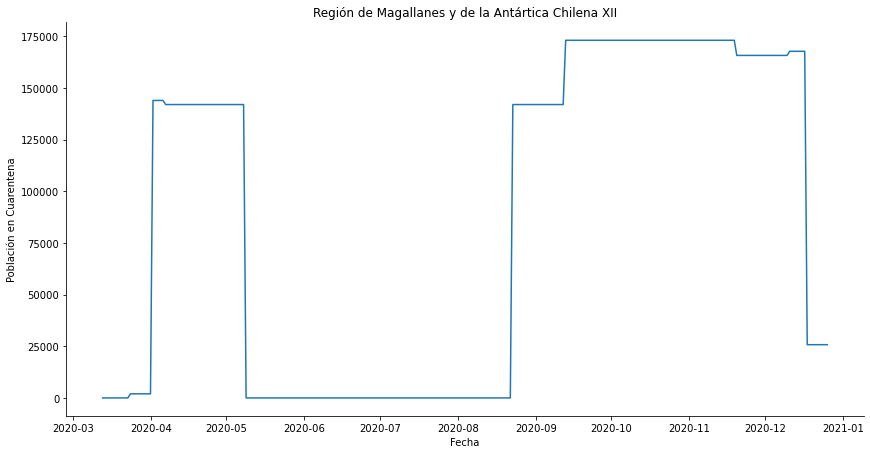

In [58]:
sns.relplot(data = Cuarentena_RG12, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de Magallanes y de la Antártica Chilena XII')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [59]:
Cuarentena_RG12[Cuarentena_RG12.Suma_pob_cuarentena == Cuarentena_RG12.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
184,2020-09-12 21:00:00,173089.0
185,2020-09-13 21:00:00,173089.0
186,2020-09-14 21:00:00,173089.0
187,2020-09-15 21:00:00,173089.0
188,2020-09-16 21:00:00,173089.0
...,...,...
247,2020-11-14 21:00:00,173089.0
248,2020-11-15 21:00:00,173089.0
249,2020-11-16 21:00:00,173089.0
250,2020-11-17 21:00:00,173089.0


### Región Metropolitana de Santiago XIII

In [60]:
Cuarentena_RG13 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_13[(RG_13['Fecha_de_Inicio']<= date) & (RG_13['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG13[['Suma_pob_cuarentena']] = Cuarentena_RG13['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG13

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región Metropolitana de Santiago XIII')

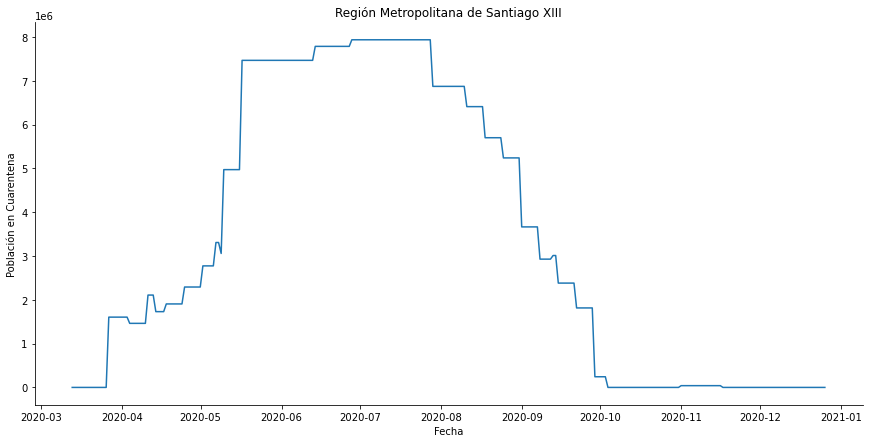

In [61]:
sns.relplot(data = Cuarentena_RG13, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región Metropolitana de Santiago XIII')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [62]:
Cuarentena_RG13[Cuarentena_RG13.Suma_pob_cuarentena == Cuarentena_RG13.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
107,2020-06-27 21:00:00,7937418.0
108,2020-06-28 21:00:00,7937418.0
109,2020-06-29 21:00:00,7937418.0
110,2020-06-30 21:00:00,7937418.0
111,2020-07-01 21:00:00,7937418.0
112,2020-07-02 21:00:00,7937418.0
113,2020-07-03 21:00:00,7937418.0
114,2020-07-04 21:00:00,7937418.0
115,2020-07-05 21:00:00,7937418.0
116,2020-07-06 21:00:00,7937418.0


### Región de Los Ríos XIV

In [63]:
Cuarentena_RG14 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_14[(RG_14['Fecha_de_Inicio']<= date) & (RG_14['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG14[['Suma_pob_cuarentena']] = Cuarentena_RG14['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG14

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,230497.0
285,2020-12-22 21:00:00,230497.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región de Los Ríos XIV')

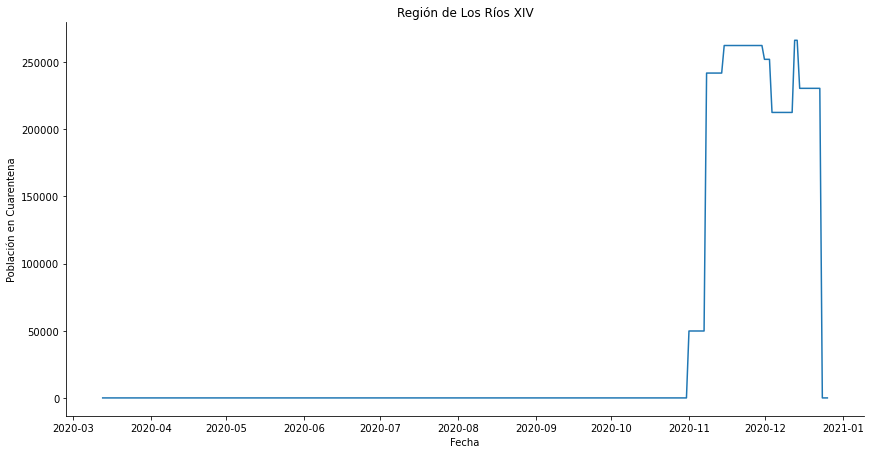

In [64]:
sns.relplot(data = Cuarentena_RG14, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de Los Ríos XIV')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [65]:
Cuarentena_RG14[Cuarentena_RG14.Suma_pob_cuarentena == Cuarentena_RG14.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
275,2020-12-12 21:00:00,266276.0
276,2020-12-13 21:00:00,266276.0


### Región de Arica y Parinacota XV

In [66]:
Cuarentena_RG15 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_15[(RG_15['Fecha_de_Inicio']<= date) & (RG_15['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG15[['Suma_pob_cuarentena']] = Cuarentena_RG15['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG15

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región de Arica y Parinacota XV')

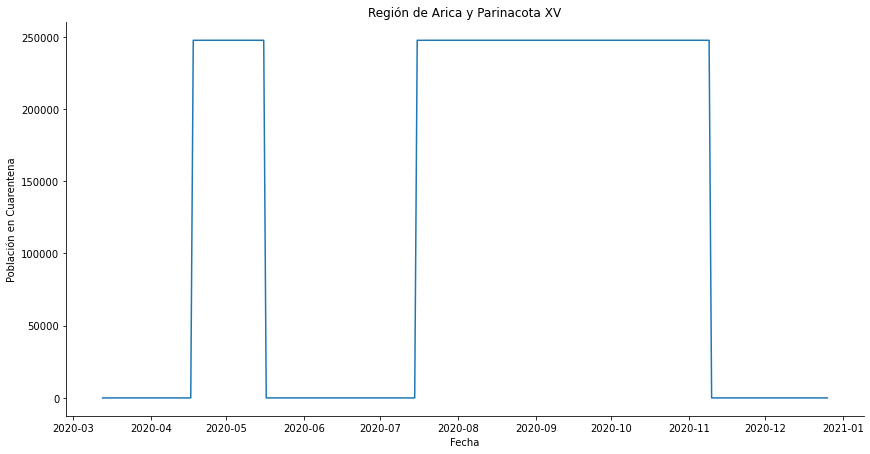

In [67]:
sns.relplot(data = Cuarentena_RG15, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de Arica y Parinacota XV')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [68]:
Cuarentena_RG15[Cuarentena_RG15.Suma_pob_cuarentena == Cuarentena_RG15.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
36,2020-04-17 21:00:00,247552.0
37,2020-04-18 21:00:00,247552.0
38,2020-04-19 21:00:00,247552.0
39,2020-04-20 21:00:00,247552.0
40,2020-04-21 21:00:00,247552.0
...,...,...
237,2020-11-04 21:00:00,247552.0
238,2020-11-05 21:00:00,247552.0
239,2020-11-06 21:00:00,247552.0
240,2020-11-07 21:00:00,247552.0


### Región de Ñuble XVI

In [69]:
Cuarentena_RG16 = pd.DataFrame(data = RangoData, columns = ['Fecha'])

def sum_pob_cuarentena (date):
    return RG_16[(RG_16['Fecha_de_Inicio']<= date) & (RG_16['Fecha_de_Término'] >= date)][['Poblacion']].sum()
Cuarentena_RG16[['Suma_pob_cuarentena']] = Cuarentena_RG16['Fecha'].transform(sum_pob_cuarentena)

Cuarentena_RG16

,Fecha,Suma_pob_cuarentena
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


Text(0.5, 1.0, 'Región de Ñuble XVI')

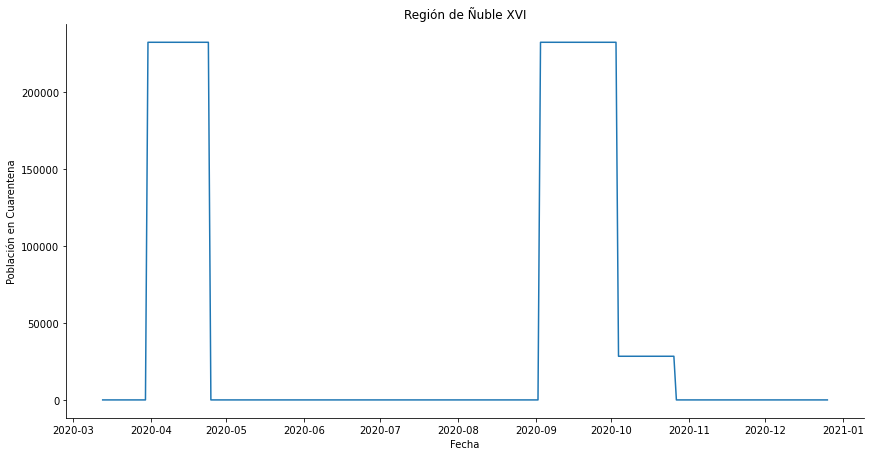

In [70]:
sns.relplot(data = Cuarentena_RG16, x = "Fecha", y ='Suma_pob_cuarentena',
    height=6, aspect=2, kind="line").set_axis_labels('Fecha', 'Población en Cuarentena')
plt.title('Región de Ñuble XVI')

##### A seguir se muestra los dias en que se tuvo la mayor cantidad de población en cuarentena en la región:

In [71]:
Cuarentena_RG16[Cuarentena_RG16.Suma_pob_cuarentena == Cuarentena_RG16.Suma_pob_cuarentena.max()]

,Fecha,Suma_pob_cuarentena
18,2020-03-30 21:00:00,232451.0
19,2020-03-31 21:00:00,232451.0
20,2020-04-01 21:00:00,232451.0
21,2020-04-02 21:00:00,232451.0
22,2020-04-03 21:00:00,232451.0
23,2020-04-04 21:00:00,232451.0
24,2020-04-05 21:00:00,232451.0
25,2020-04-06 21:00:00,232451.0
26,2020-04-07 21:00:00,232451.0
27,2020-04-08 21:00:00,232451.0
